In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
from pandas_profiling import ProfileReport
import warnings 
warnings.filterwarnings('ignore')

In [239]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
display(df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [241]:
# drop columns bcs of 100% null values
df.drop(['_c39'],axis=1,inplace=True)

In [243]:
# replace '?' value with null in dataset
df.replace({'?':np.nan},inplace=True)

In [244]:
# checking again null values
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [245]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [246]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [247]:
df["police_report_available"].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [248]:
# null value change by mode 
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
# No record regarding to incidents so fill by "No"
df['police_report_available'].fillna('NO',inplace=True)

In [249]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [250]:
df.shape

(1000, 39)

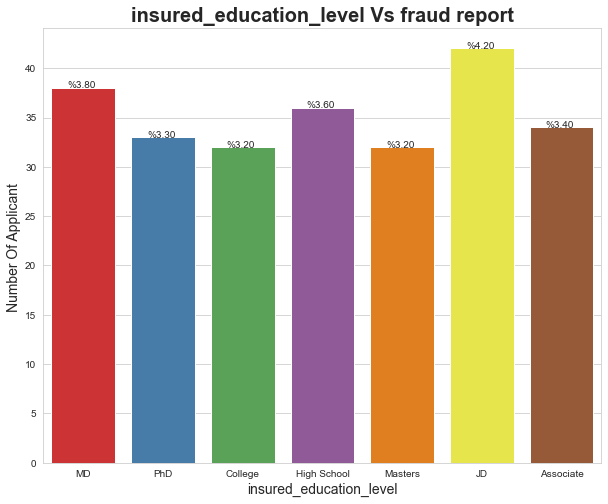

In [251]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
ax=sns.countplot(x='insured_education_level',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('insured_education_level Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('insured_education_level',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

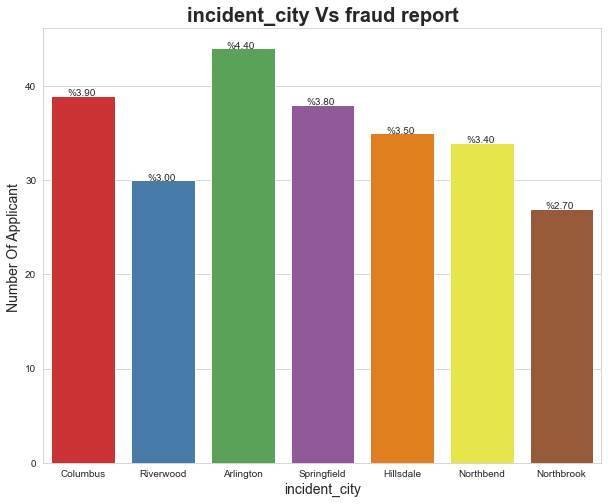

In [252]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
ax=sns.countplot(x='incident_city',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('incident_city Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('incident_city',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

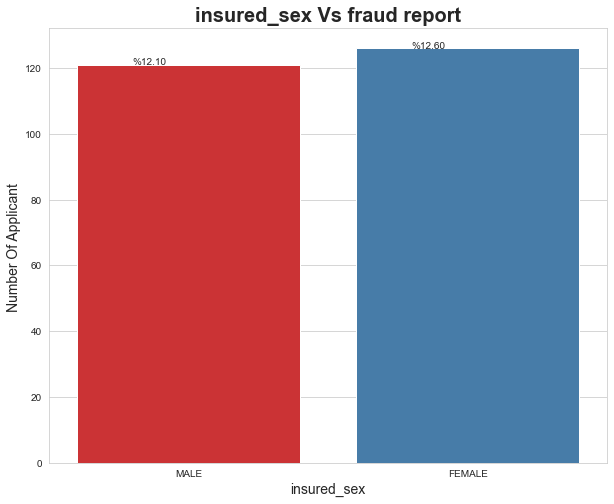

In [253]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
ax=sns.countplot(x='insured_sex',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('insured_sex Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('insured_sex',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

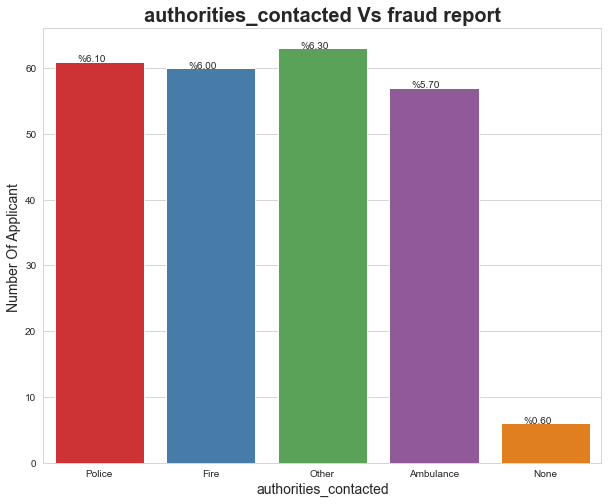

In [254]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
ax=sns.countplot(x='authorities_contacted',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('authorities_contacted Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('authorities_contacted',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

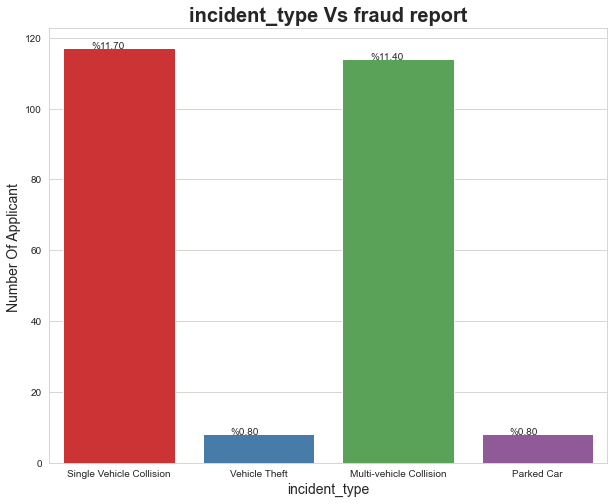

In [255]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
ax=sns.countplot(x='incident_type',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('incident_type Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('incident_type',fontsize=14)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

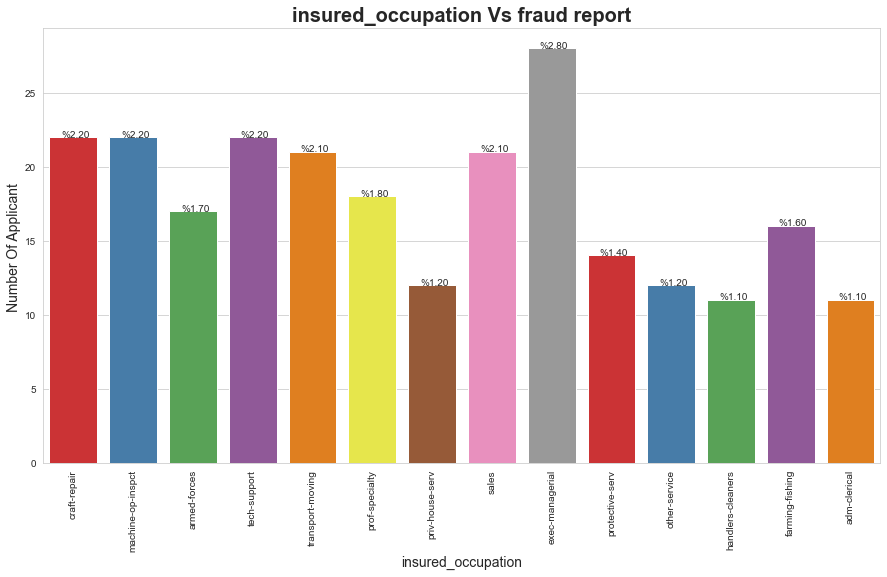

In [256]:

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax=sns.countplot(x='insured_occupation',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('insured_occupation Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('insured_occupation',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

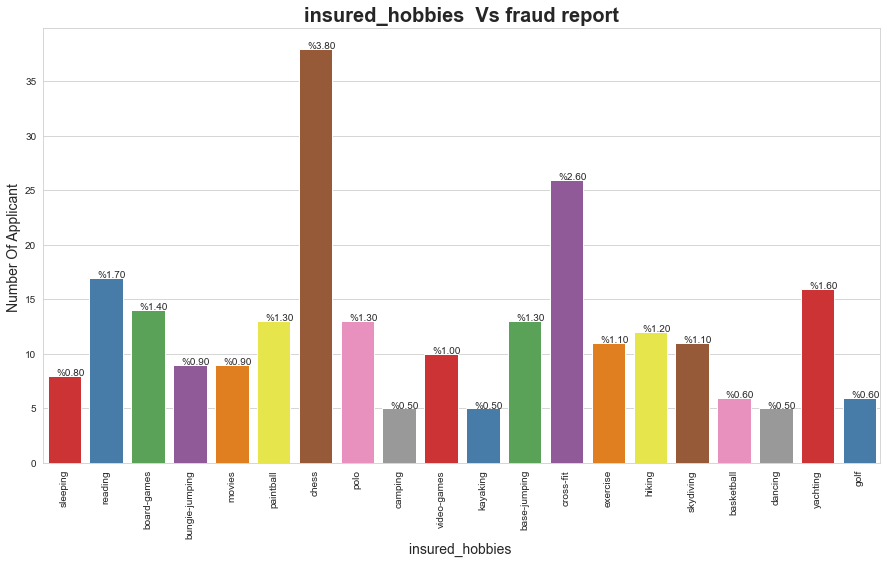

In [257]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax=sns.countplot(x='insured_hobbies',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('insured_hobbies  Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('insured_hobbies ',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

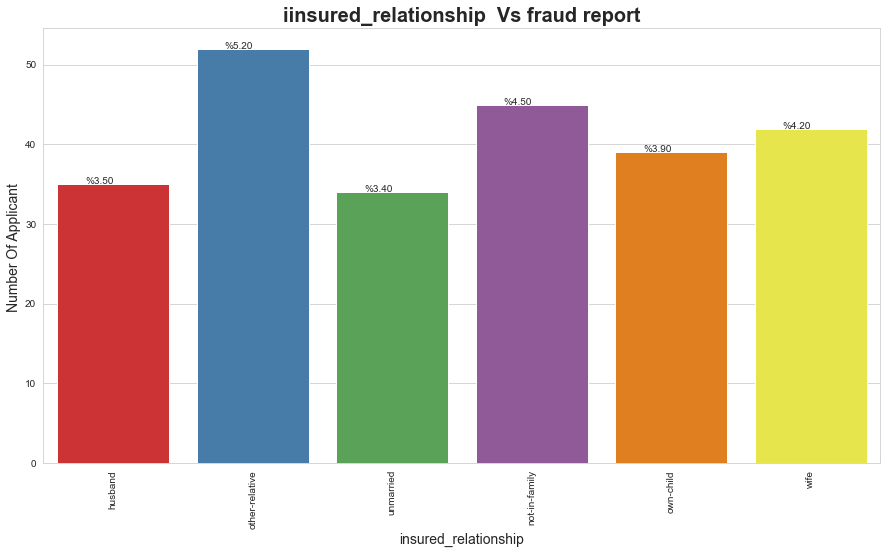

In [258]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax=sns.countplot(x='insured_relationship',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('iinsured_relationship  Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('insured_relationship',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

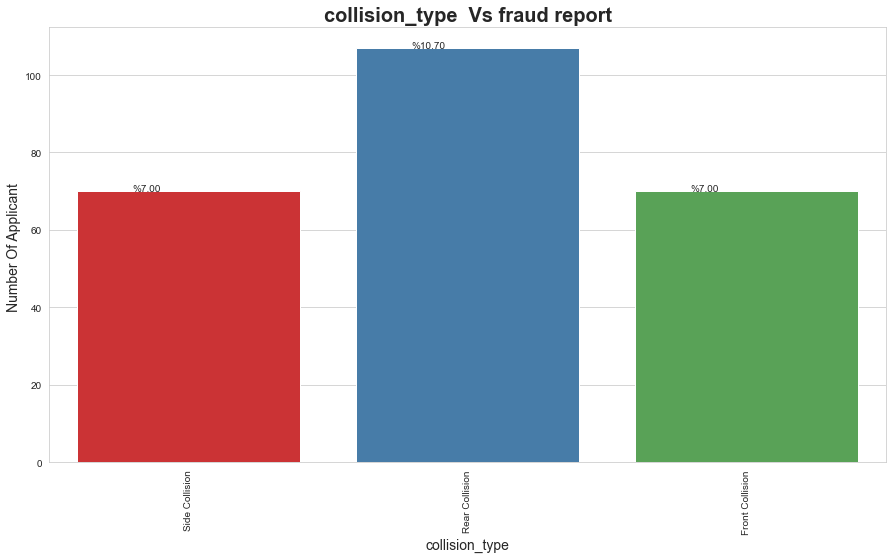

In [259]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax=sns.countplot(x='collision_type',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('collision_type  Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('collision_type',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

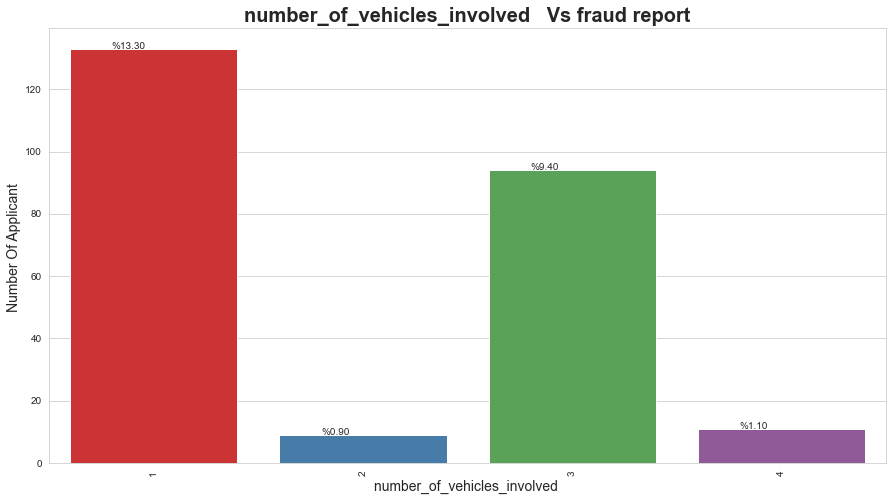

In [260]:

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax=sns.countplot(x='number_of_vehicles_involved',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('number_of_vehicles_involved   Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('number_of_vehicles_involved ',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

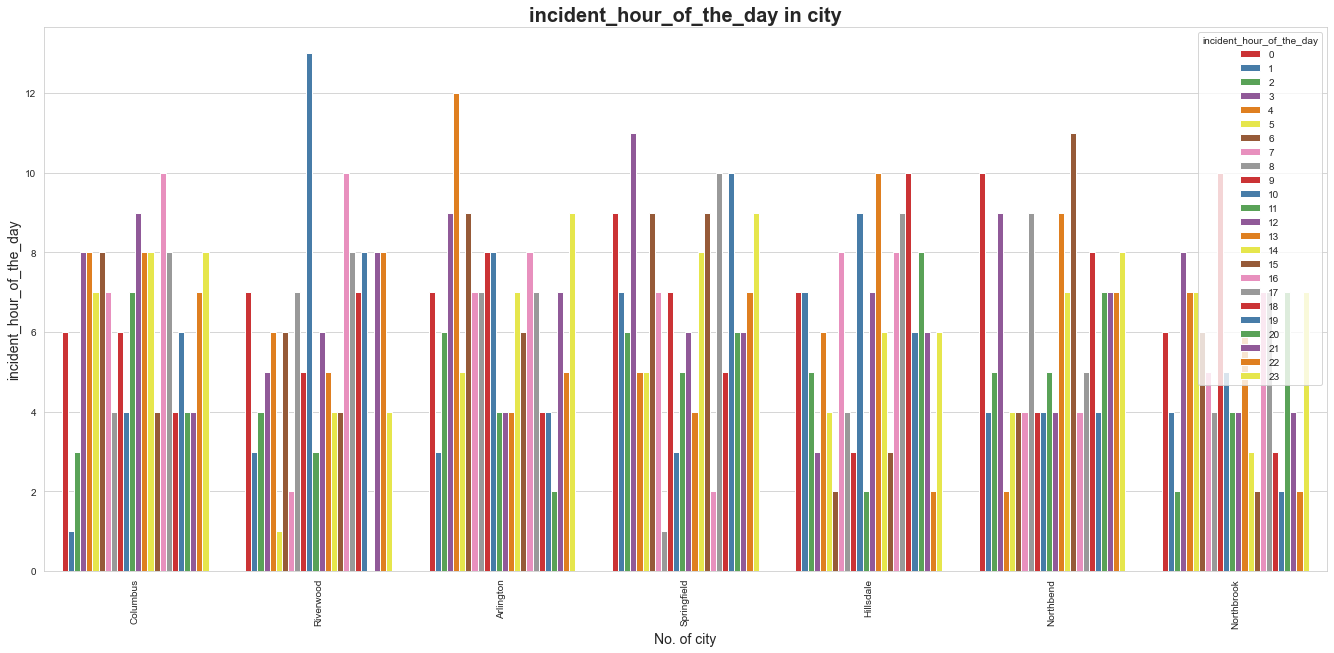

In [261]:
sns.set_style("whitegrid")
plt.figure(figsize=(23,10))
ax=sns.countplot(x='incident_city',hue='incident_hour_of_the_day',data=df,palette='Set1')
plt.title('incident_hour_of_the_day in city',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("incident_hour_of_the_day",fontsize=14)
plt.xlabel('No. of city',fontsize=14)
plt.xticks(rotation=90)
plt.show()

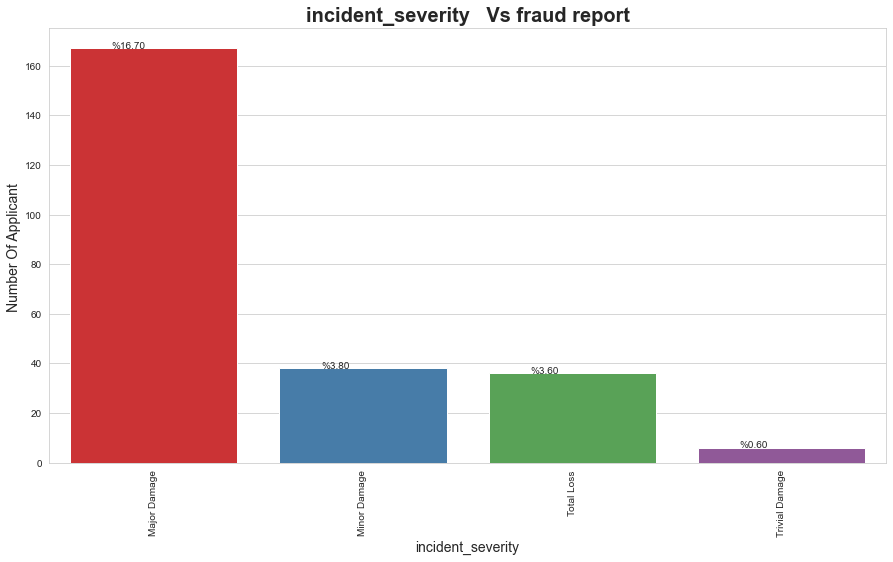

In [262]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax=sns.countplot(x='incident_severity',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('incident_severity   Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('incident_severity',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

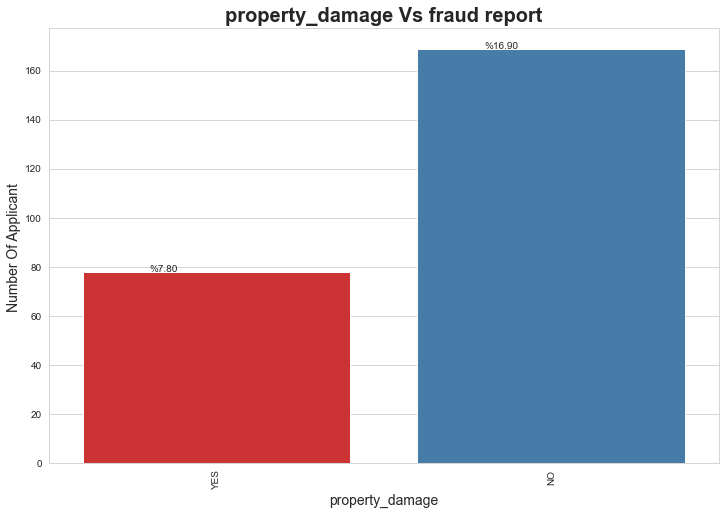

In [263]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='property_damage',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('property_damage Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('property_damage',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

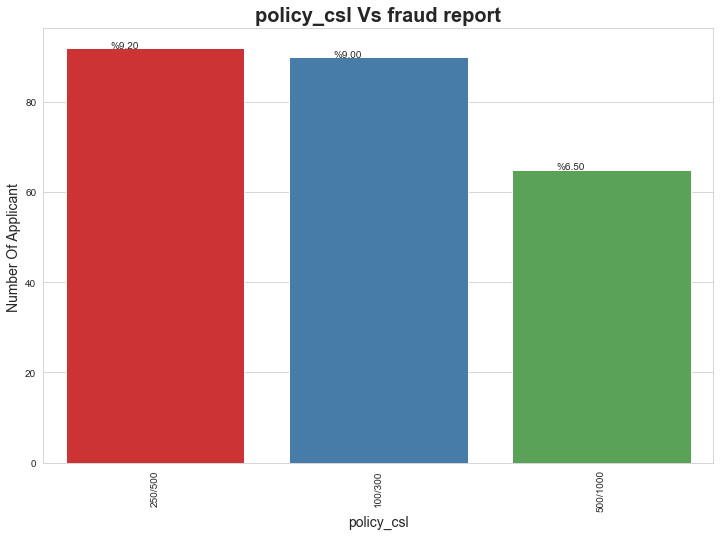

In [264]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='policy_csl',data=df.loc[df['fraud_reported']=="Y"],palette='Set1')
plt.title('policy_csl Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('policy_csl',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

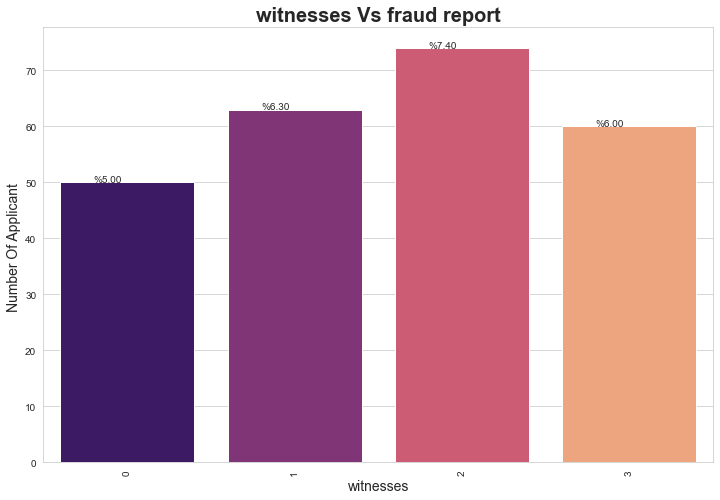

In [265]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
ax=sns.countplot(x='witnesses',data=df.loc[df['fraud_reported']=="Y"],palette='magma')
plt.title('witnesses Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('witnesses',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x()+0.2, p.get_height()))
plt.show()

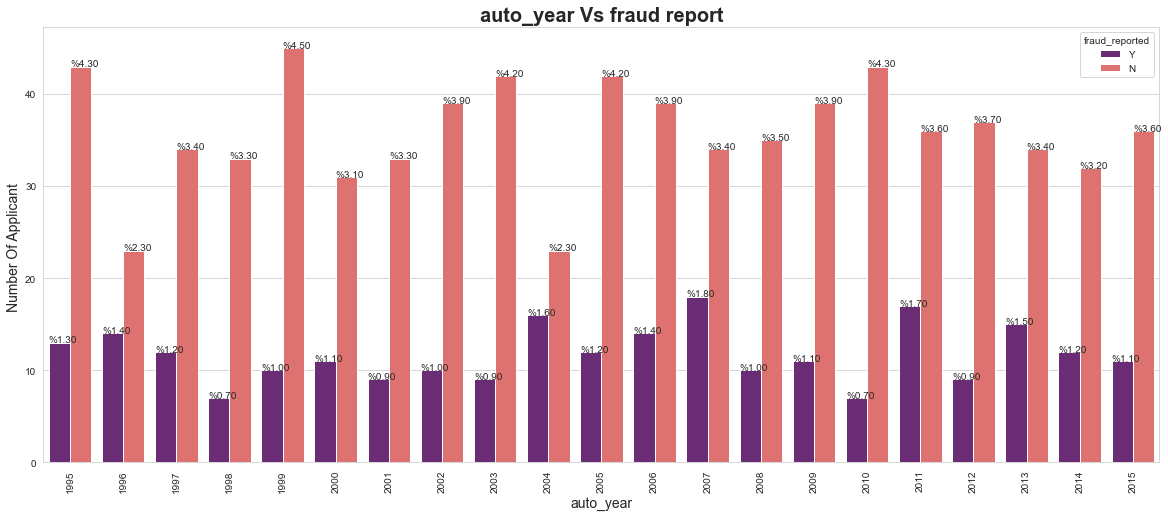

In [266]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
ax=sns.countplot(x='auto_year',hue='fraud_reported',data=df,palette='magma')
plt.title('auto_year Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('auto_year',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()))
plt.show()

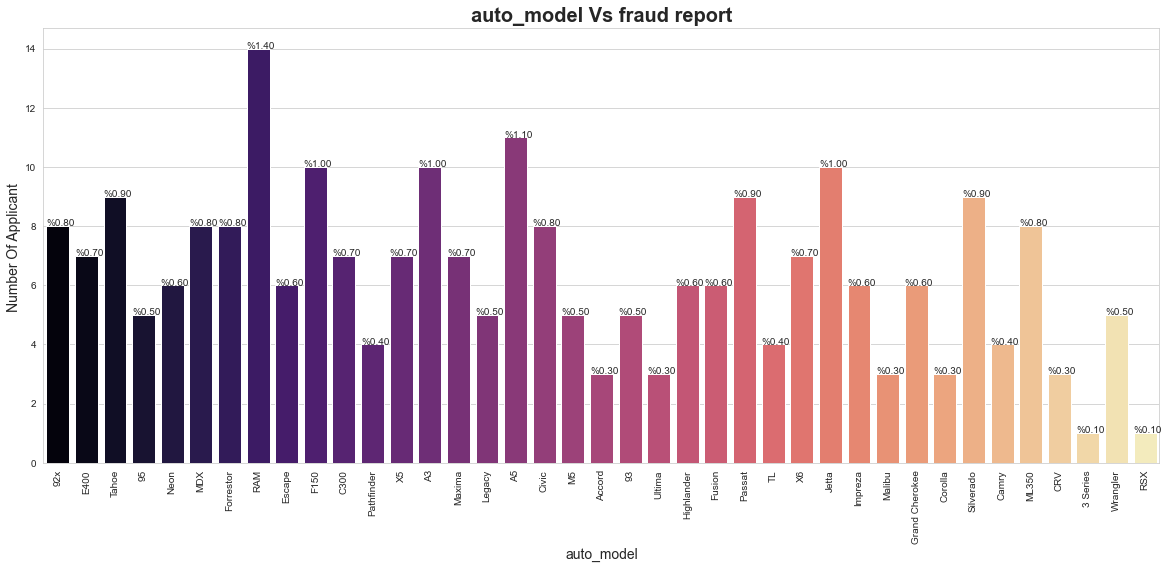

In [267]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
ax=sns.countplot(x='auto_model',data=df.loc[df['fraud_reported']=="Y"],palette='magma')
plt.title('auto_model Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('auto_model',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()))
plt.show()

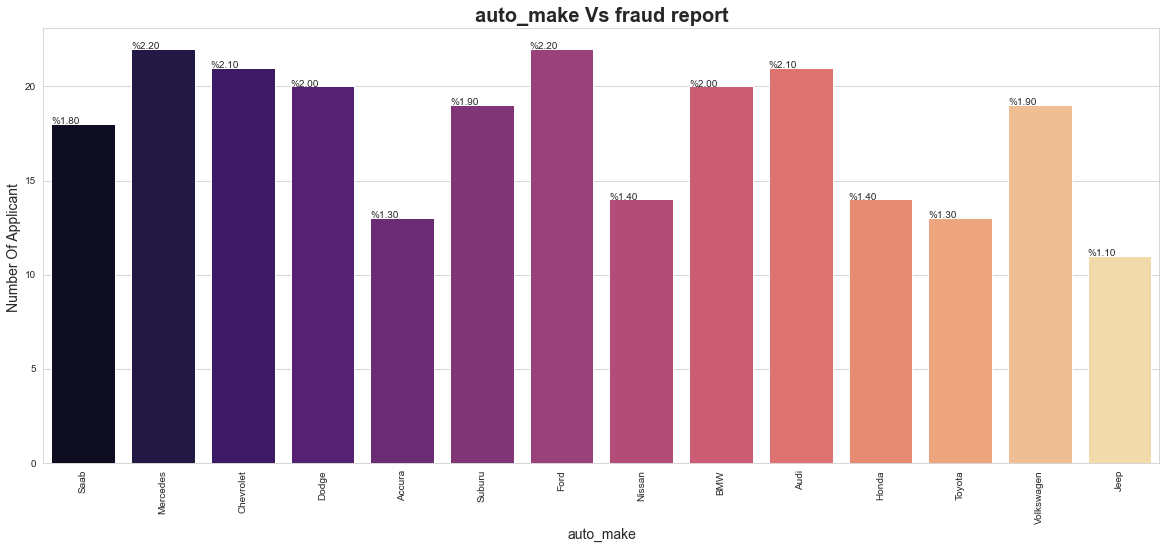

In [268]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
ax=sns.countplot(x='auto_make',data=df.loc[df['fraud_reported']=="Y"],palette='magma')
plt.title('auto_make Vs fraud report',fontdict={'fontweight':'bold','fontsize':20})
plt.ylabel("Number Of Applicant ",fontsize=14)
plt.xlabel('auto_make',fontsize=14)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('%{:.2f}'.format(p.get_height()/1000*100), (p.get_x(), p.get_height()))
plt.show()

Text(0.5, 0, 'fraud_reported')

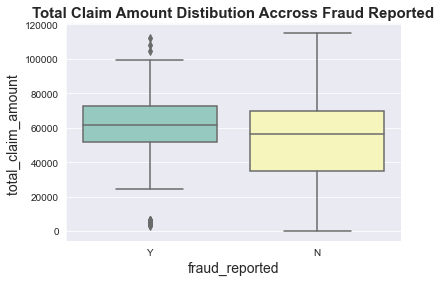

In [269]:
sns.set_style('darkgrid')
sns.boxplot(y=df['total_claim_amount'],x=df['fraud_reported'],palette='Set3')
plt.title('Total Claim Amount Distibution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("total_claim_amount ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

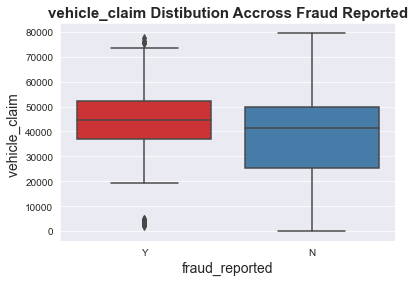

In [270]:
sns.set_style('darkgrid')
sns.boxplot(y=df['vehicle_claim'],x=df['fraud_reported'],palette='Set1')
plt.title('vehicle_claim Distibution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("vehicle_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

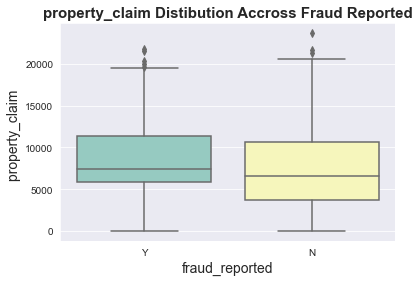

In [271]:
sns.set_style('darkgrid')
sns.boxplot(y=df['property_claim'],x=df['fraud_reported'],palette='Set3')
plt.title('property_claim Distibution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("property_claim ",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

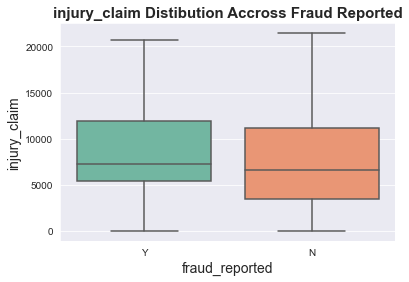

In [272]:
sns.set_style('darkgrid')
sns.boxplot(y=df['injury_claim'],x=df['fraud_reported'],palette='Set2')
plt.title('injury_claim Distibution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("injury_claim",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

Text(0.5, 0, 'fraud_reported')

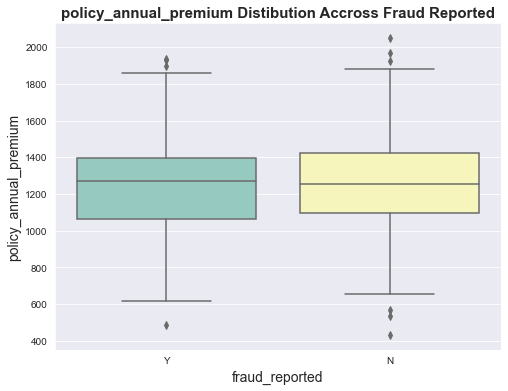

In [273]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.boxplot(y=df['policy_annual_premium'],x=df['fraud_reported'],palette='Set3')
plt.title('policy_annual_premium Distibution Accross Fraud Reported',fontdict={'fontweight':'bold','fontsize':15})
plt.ylabel("policy_annual_premium",fontsize=14)
plt.xlabel('fraud_reported',fontsize=14)

In [274]:
# remove unnecessary column
df.drop(['policy_number','policy_bind_date','incident_date','incident_location','insured_zip','umbrella_limit'],axis=1,inplace=True)

In [275]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [276]:
# encoding the categorical columns

lb=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'O':
        df[i]=lb.fit_transform(df[i])
    

In [277]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,1,4,2,17,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,1,4,6,15,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,0,6,11,2,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,0,6,1,2,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,1,0,11,2,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,5,2,13,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,0,0,1000,1436.79,0,6,9,17,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,2,1,500,1383.49,0,5,1,3,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,0,2,2000,1356.92,1,0,5,0,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [278]:
# statistics of dataset
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,0.463000,2.966000,6.653000,9.731000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,0.498879,1.948497,4.019048,5.674049,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000,1.000000,3.000000,5.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000,3.000000,7.000000,10.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,1.000000,5.000000,10.000000,15.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000,6.000000,13.000000,19.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [279]:
df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_state                   0.029432
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
property_damage                0.017202
bodily_injuries                0.033877
witnesses                      0.049497
police_report_available       -0.027768


<AxesSubplot:>

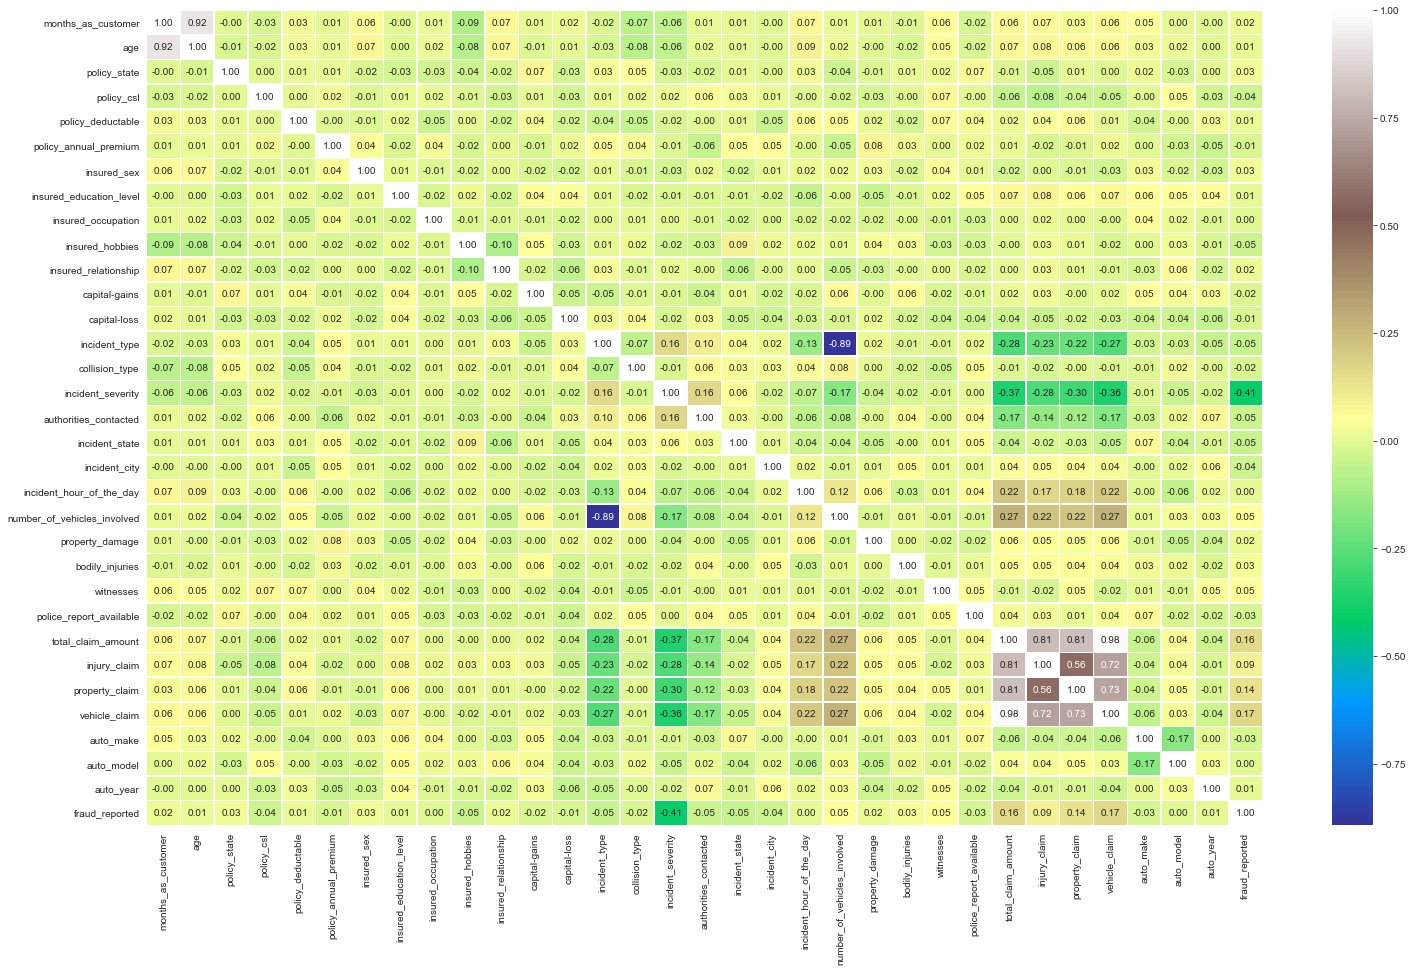

In [280]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,cmap='terrain',fmt='1.2f',linewidth=0.5)

#### age and month_As_customer are correlated with each other
#### inccident_type and no_vechicle_involved are colinear with each other
#### stotal claim,injury claim,prpoerty claim,vehicle claim are multicolinear with each other chech VIF for that columns

In [281]:
# remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
thresold=3
print(np.where(z>3))

(array([229, 248, 500, 763, 807], dtype=int64), array([ 5,  5, 27,  5, 12], dtype=int64))


In [282]:
df1=df[(z<3).all(axis=1)]

In [283]:
df1.shape

(995, 33)

In [284]:
print('data loss after outlier remove %',((1000-995)/1000)*100)

data loss after outlier remove % 0.5


In [285]:
#checking skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


In [286]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [288]:
# for  numerical columns skewness more than  8 so take thresold 0.7 so not effect categorical columns
for index in x.skew().index:
    if x.skew().loc[index]>0.8:
        x[index]=np.sqrt(x[index])

In [289]:
x.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


In [290]:
# apply standardscaler
sc=StandardScaler()
x1=sc.fit_transform(x)

In [291]:
# checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x1,i) for i in range(x1.shape[1])]
vif['columns']=x.columns
vif

,vif,columns
0,6.834982,months_as_customer
1,6.844303,age
2,1.031350,policy_state
3,1.026424,policy_csl
4,1.035418,policy_deductable
5,1.033978,policy_annual_premium
6,1.023974,insured_sex
7,1.038417,insured_education_level
8,1.013599,insured_occupation
9,1.048112,insured_hobbies


#### vif score age and moth customer are colinear so by checking relation with target column drop age
#### incident type and no.vechicle are related bcs they show no.vechicle involved in accident so drop incident type negative with target column
#### total cliam amount also show the injuty,property,vechile amount so drop that

In [292]:
# drop mulicolinear columns
x.drop(['age','incident_type','total_claim_amount'],axis=1,inplace=True)

In [293]:
sc=StandardScaler()
x1=sc.fit_transform(x)

In [294]:
x1.shape

(1000, 29)

In [295]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3)

In [296]:
# apply smote for inbalance dataset
from imblearn.over_sampling import SMOTE
x1,y1 = SMOTE().fit_resample(x_train,y_train)

In [299]:
# select best ramdom state
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=i)
    lg.fit(x_train,y_train)
    pred_tr=lg.predict(x_train)
    pred_te=lg.predict(x_test)
    if round(roc_auc_score(y_train,pred_tr)*100,1)==round(roc_auc_score(y_test,pred_te)*100,1):
        print('\n Random State',i)
        print('roc_auc_score TR',roc_auc_score(y_train,pred_tr)*100)
        print('roc_auc_score TE',roc_auc_score(y_test,pred_te)*100)


 Random State 20
roc_auc_score TR 74.70785907859079
roc_auc_score TE 74.74307373686062

 Random State 34
roc_auc_score TR 75.64769647696475
roc_auc_score TE 75.61642765034584

 Random State 40
roc_auc_score TR 74.71889001300764
roc_auc_score TE 74.73433348960776

 Random State 142
roc_auc_score TR 76.01700060716455
roc_auc_score TE 76.03270223752152

 Random State 169
roc_auc_score TR 76.23149861239594
roc_auc_score TE 76.18824265165729

 Random State 211
roc_auc_score TR 76.76856368563686
roc_auc_score TE 76.8434215153765

 Random State 380
roc_auc_score TR 75.47836773050928
roc_auc_score TE 75.52541974873782

 Random State 397
roc_auc_score TR 76.30323531962875
roc_auc_score TE 76.33390705679861


In [301]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=397)
lg.fit(x_train,y_train)
predict=lg.predict(x_test)
print('Train score: ',lg.score(x_train,y_train)*100)
print('f1 Score:  ',f1_score(y_test,predict)*100)
print('accuracy score ',accuracy_score(y_test,predict)*100)
print('roc auc score ',roc_auc_score(y_test,predict)*100)
print('Confusion matrix \n',confusion_matrix(y_test,predict))
print('Classification report \n',classification_report(y_test,predict))

Train score:  76.34408602150538
f1 Score:   76.1006289308176
accuracy score  76.25
roc auc score  76.33390705679861
Confusion matrix 
 [[123  43]
 [ 33 121]]
Classification report 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       166
           1       0.74      0.79      0.76       154

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



In [302]:
neighbors={"n_neighbors":range(1,20)}
clf = GridSearchCV(KNeighborsClassifier(),neighbors, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'n_neighbors': 4}

In [303]:
dtc=DecisionTreeClassifier()
svc=SVC()
svcl=SVC(kernel='linear')
svcp=SVC(kernel='poly')
kn=KNeighborsClassifier(n_neighbors=4)
sgd=SGDClassifier()
xgb=XGBClassifier()
xgbr=XGBRFClassifier()

In [304]:
def classifiers(f):
    f.fit(x_train,y_train)
    print(f,'\n',f.score(x_train,y_train)*100)
    pred=f.predict(x_test)
    print('Accuracy score:\n',accuracy_score(y_test,pred)*100)
    print('F1 score:\n',f1_score(y_test,pred)*100)
    print('roc auc score ',roc_auc_score(y_test,pred)*100)
    print('Confusion matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))

In [305]:
classifiers(dtc)

DecisionTreeClassifier() 
 100.0
Accuracy score:
 87.8125
F1 score:
 87.21311475409836
roc auc score  87.76013143483024
Confusion matrix:
 [[148  18]
 [ 21 133]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       166
           1       0.88      0.86      0.87       154

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



In [306]:
classifiers(svc)

SVC() 
 97.17741935483872
Accuracy score:
 85.0
F1 score:
 84.31372549019608
roc auc score  84.95540603974338
Confusion matrix:
 [[143  23]
 [ 25 129]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       166
           1       0.85      0.84      0.84       154

    accuracy                           0.85       320
   macro avg       0.85      0.85      0.85       320
weighted avg       0.85      0.85      0.85       320



In [307]:
classifiers(svcl)

SVC(kernel='linear') 
 77.41935483870968
Accuracy score:
 76.5625
F1 score:
 76.03833865814697
roc auc score  76.5881708652793
Confusion matrix:
 [[126  40]
 [ 35 119]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       166
           1       0.75      0.77      0.76       154

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [308]:
classifiers(svcp)

SVC(kernel='poly') 
 99.19354838709677
Accuracy score:
 83.75
F1 score:
 84.33734939759036
roc auc score  84.00876232201534
Confusion matrix:
 [[128  38]
 [ 14 140]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       166
           1       0.79      0.91      0.84       154

    accuracy                           0.84       320
   macro avg       0.84      0.84      0.84       320
weighted avg       0.85      0.84      0.84       320



In [309]:
classifiers(sgd)

SGDClassifier() 
 63.575268817204304
Accuracy score:
 65.625
F1 score:
 63.08724832214765
roc auc score  65.4592395556251
Confusion matrix:
 [[116  50]
 [ 60  94]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       166
           1       0.65      0.61      0.63       154

    accuracy                           0.66       320
   macro avg       0.66      0.65      0.65       320
weighted avg       0.66      0.66      0.66       320



In [310]:
classifiers(xgb)

[18:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 
 100.0
Accuracy score:
 88.4375
F1 score:
 87.62541806020067
roc auc score  88.31560006258803
Confusion mat

In [311]:
classifiers(xgbr)

[18:09:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None) 
 94.22043010752688
Accuracy score:
 86.5625
F1 score:
 85.61872909698997
roc auc score  86.43795963073072
Confusion matrix:
 [[149  17

In [312]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [313]:
ensemble=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in ensemble:
    i.fit(x_train,y_train)
    print(i,'\n\n score: \n',i.score(x_train,y_train)*100)
    pred=i.predict(x_test)
    print(' F1 score:',f1_score(y_test,pred)*100)
    print('Accuracy scoer:\n',accuracy_score(y_test,pred)*100)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))

RandomForestClassifier() 

 score: 
 100.0
 F1 score: 87.83783783783784
Accuracy scoer:
 88.75
Confusion_matrix:
 [[154  12]
 [ 24 130]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       166
           1       0.92      0.84      0.88       154

    accuracy                           0.89       320
   macro avg       0.89      0.89      0.89       320
weighted avg       0.89      0.89      0.89       320

AdaBoostClassifier() 

 score: 
 91.39784946236558
 F1 score: 79.16666666666667
Accuracy scoer:
 81.25
Confusion_matrix:
 [[146  20]
 [ 40 114]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       166
           1       0.85      0.74      0.79       154

    accuracy                           0.81       320
   macro avg       0.82      0.81      0.81       320
weighted avg       0.82      0.81      0.81       320

GradientBoosting

In [315]:
# hypertuning the parameter of model selected
parameters={"n_estimators":[1500,1000,500],'learning_rate':[0.1,0.01,0.001],'max_features':['auto', 'sqrt', 'log2']}
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'learning_rate': 0.1, 'max_features': 'log2', 'n_estimators': 1500}

In [316]:
parameters={"n_estimators":[1500,500,1000],'learning_rate':[0.1,0.01,0.001],'max_depth':[3,5,7],'subsample':[0.8,1],'eval_metric':['mlogloss','logloss']}
clf = GridSearchCV(XGBRFClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'eval_metric': 'mlogloss',
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 1000,
 'subsample': 0.8}

In [325]:
parameters={"n_estimators":[1500,1000,500],'bootstrap':[True,False],'bootstrap_features':[True,False]}
clf = GridSearchCV(BaggingClassifier(), parameters, cv=5,scoring="roc_auc")
clf.fit(x1,y1)
clf.best_params_

{'bootstrap': True, 'bootstrap_features': True, 'n_estimators': 1000}

In [326]:
bg=BaggingClassifier(n_estimators=1000,bootstrap=True,bootstrap_features=True)
bg.fit(x_train,y_train)
print(bg,'\n\n score: \n',bg.score(x_train,y_train)*100)
pred_bg=bg.predict(x_test)
print(' F1 score:',f1_score(y_test,pred_bg)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_bg)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_bg))
print('Classification report:\n',classification_report(y_test,pred_bg))

BaggingClassifier(bootstrap_features=True, n_estimators=1000) 

 score: 
 100.0
 F1 score: 87.83783783783784
Accuracy scoer:
 88.75
Confusion_matrix:
 [[154  12]
 [ 24 130]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       166
           1       0.92      0.84      0.88       154

    accuracy                           0.89       320
   macro avg       0.89      0.89      0.89       320
weighted avg       0.89      0.89      0.89       320



In [318]:
gd=GradientBoostingClassifier(learning_rate=0.1,max_features='log2',n_estimators=1500)
gd.fit(x_train,y_train)
print(gd,'\n\n score: \n',gd.score(x_train,y_train)*100)
pred_gd=gd.predict(x_test)
print(' F1 score:',f1_score(y_test,pred_gd)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_gd)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_gd))
print('Classification report:\n',classification_report(y_test,pred_gd))

GradientBoostingClassifier(max_features='log2', n_estimators=1500) 

 score: 
 100.0
 F1 score: 85.31468531468532
Accuracy scoer:
 86.875
Confusion_matrix:
 [[156  10]
 [ 32 122]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       166
           1       0.92      0.79      0.85       154

    accuracy                           0.87       320
   macro avg       0.88      0.87      0.87       320
weighted avg       0.88      0.87      0.87       320



In [317]:
xg2=XGBClassifier(scale_pos_weight=1,
                      learning_rate=0.1,
                      subsample =0.8, 
                      n_estimators=1000, 
                      reg_alpha = 0.25,
                      max_depth=7,
                 eval_metric='mlogloss')
xg2.fit(x_train,y_train)
print(xg2,'\n\n score: \n',xg2.score(x_train,y_train)*100)
pred_xgr=xg2.predict(x_test)
print('auc roc score:',roc_auc_score(y_test,pred_xgr)*100)
print(' F1 score:',f1_score(y_test,pred_xgr)*100)
print('Accuracy scoer:\n',accuracy_score(y_test,pred_xgr)*100)
print('Confusion_matrix:\n',confusion_matrix(y_test,pred_xgr))
print('Classification report:\n',classification_report(y_test,pred_xgr))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0.25, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None) 

 score: 
 100.0
auc roc score: 88.98842121733688
 F1 score: 88.44884488448844
Accuracy scoer:
 89.0625
Confusion_matrix:
 [[151  15]
 [ 20 134]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       166
           1       0.90      0.87      0.88       154

    accuracy                           0.89    

In [330]:
# use voting classifiers
from sklearn.ensemble import VotingClassifier
clf1 = gd
clf2 = xg2
clf3= bg
vtc = VotingClassifier(estimators=[('gd', clf1), ('xg2', clf2),('bg',clf3)], voting='hard')
vtc.fit(x_train, y_train)
predictions = vtc.predict(x_test)
print(vtc.score(x_train,y_train))
print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
0.88125
0.87248322147651
0.8799092473791269
[[152  14]
 [ 24 130]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       166
           1       0.90      0.84      0.87       154

    accuracy                           0.88       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.88      0.88      0.88       320



In [336]:
for i in range(2,15):
    crs_score=cross_val_score(VotingClassifier(estimators=[('gd', clf1), ('xg2', clf2), ('bg', clf3)]),x1,y1,cv=i)
    score=crs_score.mean()
    print('cv value:',i)
    print('cross value score:',score*100)
    print('actual score:',roc_auc_score(y_test,predictions)*100)

cv value: 2
cross value score: 84.02255639097744
actual score: 87.99092473791269
cv value: 3
cross value score: 83.37312007639056
actual score: 87.99092473791269
cv value: 4
cross value score: 86.18421052631578
actual score: 87.99092473791269
cv value: 5
cross value score: 87.41208255824255
actual score: 87.99092473791269
cv value: 6
cross value score: 87.7071034088745
actual score: 87.99092473791269
cv value: 7
cross value score: 89.09774436090225
actual score: 87.99092473791269
cv value: 8
cross value score: 89.56766917293233
actual score: 87.99092473791269
cv value: 9
cross value score: 89.86848976878889
actual score: 87.99092473791269
cv value: 10
cross value score: 89.49832481043907
actual score: 87.99092473791269
cv value: 11
cross value score: 89.58040456107467
actual score: 87.99092473791269
cv value: 12
cross value score: 89.39500340483488
actual score: 87.99092473791269
cv value: 13
cross value score: 89.67178560674495
actual score: 87.99092473791269
cv value: 14
cross value 

In [339]:
# cross validation
scores=cross_val_score(VotingClassifier(estimators=[('gd', clf1), ('xg2', clf2), ('bg', clf3)]),x1,y1,cv=6)
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

CV mean 0.8780126536744324
std: 0.07953557433757362


AUC roc score:  87.99092473791269


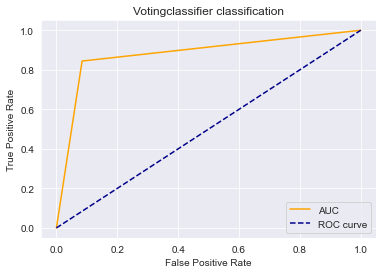

In [338]:
# auc roc curve score
fpr, tpr, threshold = roc_curve(y_test,predictions)
print('AUC roc score: ',roc_auc_score(y_test,predictions)*100)
plt.plot(fpr, tpr, color ='orange', label ='AUC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Votingclassifier classification')
plt.legend()
plt.show()

In [340]:
# saving model on best f1, acuuracy and roc_auc score 
import joblib
joblib.dump(VotingClassifier(estimators=[('gd', clf1), ('xg2', clf2), ('bg', clf3)]),'insurancefraud.obj')
insurancefraud=joblib.load('insurancefraud.obj')
pd.DataFrame({'Actual':y_test,'Prediction':predictions})

,Actual,Prediction
155,0,0
22,1,1
444,0,0
482,1,1
379,0,0
...,...,...
357,0,0
797,1,1
911,1,1
510,0,0
